In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
from itertools import combinations
'''
Using function now instead of writing things over and over again 
'''

'\nUsing function now instead of writing things over and over again \n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object_v2
importlib.reload(Subject_Object_v2)
importlib.reload(plot_functions)
import plot_functions as pf
import read_data_functions as rdf
import Statistics_Object
importlib.reload(Statistics_Object)

<module 'Statistics_Object' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Statistics_Object.py'>

## Initial Thangs

In [3]:
experiment = 'Exp2'

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

xlabel = 'Feedback Condition'
condition_nums = ['0','1','2','3']
num_blocks = len(condition_nums)

num_trials = 50
num_rows,num_cols = 2,2
f1_xlabel = 'Incorrect Reward'
f2_xlabel = 'Indecision Reward'
f1_collapse_xticklabs = ['0 Incorrect','-1 Incorrect']
f2_collapse_xticklabs = ['0 Indecision','-1 Indecision']
    


## Pickle Objects

In [5]:
load_path = r'Subjects_Analyzed'
subject_objects = rdf.generate_subject_objects(experiment)
group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
                                    task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                    reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
group.analyze_data()

Sub1
Sub2
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17


D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:502: RuntimeWarning: All-NaN slice encountered
  self.init_reach_posx_single_timepoint = np.nanmax(self.init_reach_posx*self.init_reach_pos_mask,axis=2)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:567: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:578: RuntimeWarning: divide by zero encountered in divide
  self.mu_s_alternate = (self.phat_correct*self.mhat_correct_alternate - self.phat_error*self.mhat_error_alternate)/(self.phat_correct - self.phat_error)


## Set Save to True or False

In [6]:
save = False

In [7]:
react_mixed_median  = np.nanmedian(group.react_reaction_time_mixed,axis=1)
react_only_median   = np.nanmedian(group.react_reaction_time_only_react,axis=1)
gamble_mixed_median = np.nanmedian(group.gamble_reaction_time_mixed,axis=1)
gamble_only_median  = np.nanmedian(group.gamble_reaction_time_only_gamble,axis=1)


In [8]:
react_mixed_median  = np.nanmedian(group.react_reaction_time_mixed,axis=1)
react_only_median   = np.nanmedian(group.react_reaction_time_only_react,axis=1)
guess_mixed_median = np.nanmedian(group.gamble_reaction_time_mixed,axis=1)
guess_only_median  = np.nanmedian(group.gamble_reaction_time_only_gamble,axis=1)
react_mixed_std  = np.nanstd(group.react_reaction_time_mixed,axis=1)
react_only_std   = np.nanstd(group.react_reaction_time_only_react,axis=1)
guess_mixed_std = np.nanstd(group.gamble_reaction_time_mixed,axis=1)
guess_only_std  = np.nanstd(group.gamble_reaction_time_only_gamble,axis=1)

reaction_time_median = np.vstack((react_mixed_median,guess_mixed_median,react_only_median,guess_only_median)).T
reaction_time_std    = np.vstack((react_mixed_std,guess_mixed_std,react_only_std,guess_only_std)).T


In [9]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.vstack((a,b)).T[:,0]

array([1, 2, 3])

In [10]:
react_mixed_median == reaction_time_median[:,0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Initialize bootstrap

In [11]:
so = Statistics_Object.Statistics(df=None, experiment = experiment, num_subjects=num_subjects,num_blocks=num_blocks,num_trials=num_trials,trial_block_titles=None,
                                  xlab =None, f1_xticklabels=None,f2_xticklabels=None,f1_xlabel=None,f2_xlabel=None,
                                  M = 1e6)

In [18]:
_,b = so.pairwise_bootstrap(reaction_time_median,condition_nums = condition_nums,M=1e1,test='mean')

In [19]:
pvals,cles = so.pairwise_bootstrap(reaction_time_median,condition_nums = condition_nums,M=1e4,test='mean')

Text(0.5, 1.0, 'Median Reaction Time')

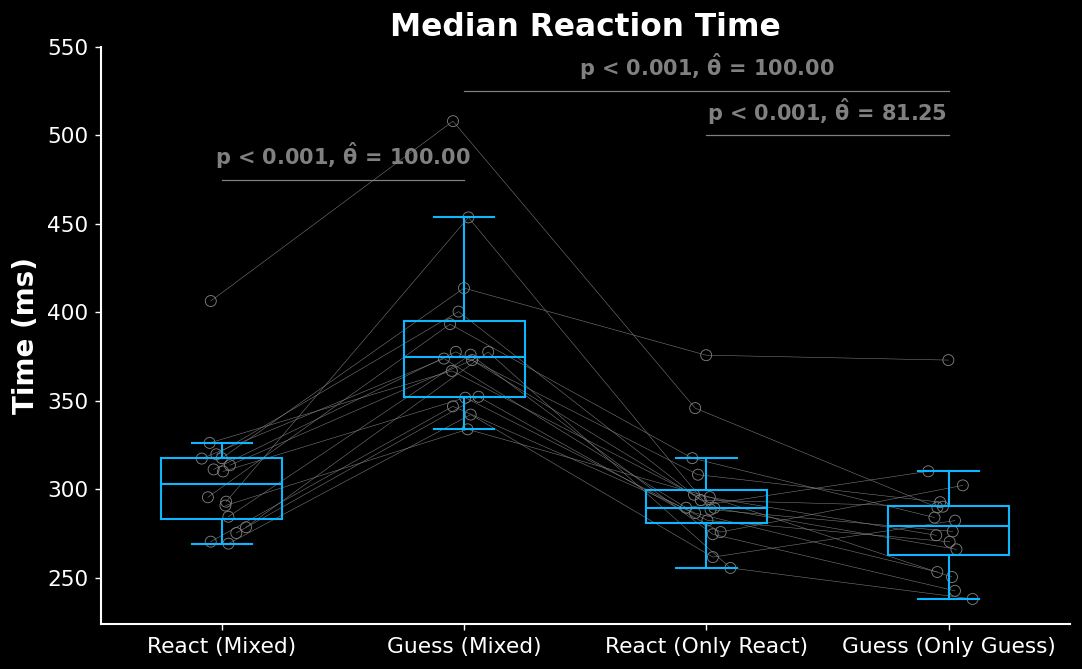

In [21]:
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(reaction_time_median[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_median[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_median[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_median[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed_median,guess_mixed_median,react_only_median,guess_only_median],circle_size = 40,include_mean=False)

statline_y = 475
shift = 25
xlocs = np.arange(0,5,1)
combos = so.create_combos(condition_nums)
combos = ['01','23','13']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=5)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(250,600,50))
ax.set_xticklabels(xlabs)
ax.set_ylabel('Time (ms)')
ax.set_title('Median Reaction Time')

In [22]:
pvals,cles = so.pairwise_bootstrap(reaction_time_std,condition_nums = condition_nums,M=1e4,test='mean')

Text(0.5, 1.0, 'Reaction Time SD (ms)')

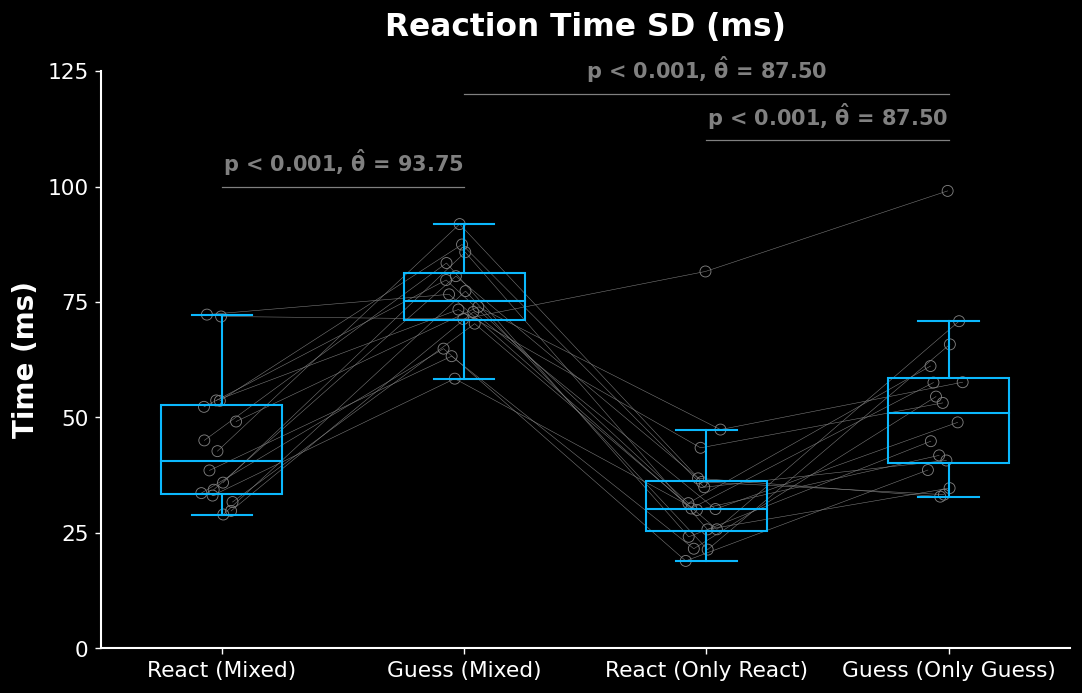

In [23]:
fig,ax = plt.subplots(figsize = (10,6))
dv.boxplot(reaction_time_std[:,0],x_pos = 0,ax=ax)
dv.boxplot(reaction_time_std[:,1],x_pos = 1,ax=ax)
dv.boxplot(reaction_time_std[:,2],x_pos = 2,ax=ax)
dv.boxplot(reaction_time_std[:,3],x_pos = 3,ax=ax)
dv.jitter_array(ax =ax, x_positions = [0,1,2,3],data_list = [react_mixed_std,guess_mixed_std,react_only_std,guess_only_std],circle_size = 40,include_mean=False)

statline_y = 100
shift = 10
xlocs = np.arange(0,5,1)
combos = so.create_combos(condition_nums)
combos = ['01','23','13']
for c in combos:
    a = int(c[0])
    b = int(c[1])
    if pvals[c]<0.05:
        dv.stat_annotation(ax,xlocs[a],xlocs[b],statline_y,p_val=pvals[c],cles=cles[c],
                        fontsize=12,h=2)
        statline_y += shift
xlabs = ['React (Mixed)','Guess (Mixed)','React (Only React)','Guess (Only Guess)']
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,150,25))
ax.set_xticklabels(xlabs)
ax.set_ylabel('Time (ms)')
ax.set_title('Reaction Time SD (ms)',pad=20)